In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express  as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [3]:
df = pd.read_csv(r"E:\ML Project MK02\notebook\data\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df['total_marks']  = pd.DataFrame(df['math score'] + df['writing score'] + df['reading score'])
df['average_score'] = df['total_marks'] / 3

In [8]:
maths_top = df[df['math score'] == 100 ]['average_score'].count()
reading_top = df[df['reading score'] == 100]['average_score'].count()
writing_top = df[df['writing score'] == 100]['average_score'].count()
top = df[df['total_marks'] == (3 * 100)] ['average_score'].count()

maths_fail = df[df['math score'] < 35] ['average_score'].count()
reading_fail = df[df['reading score'] < 35]['average_score'].count()
writing_fail = df[df['writing score'] < 35]['average_score'].count()
Failed = df[df['total_marks'] < (35 * 3)]['average_score'].count()

In [9]:
print("Maths Fail : ",maths_fail)
print("Maths Top : ",maths_top)
print("="*40)
print("Reading Fail : ",reading_fail)
print("Reading Top: ",reading_top)
print("="*40)
print("Writing Fail : ",writing_fail)
print("Writing Top: ",writing_top)
print("="*40)
print("Failed : ",Failed)
print("Topper : ",top)
print("="*40)


Maths Fail :  22
Maths Top :  7
Reading Fail :  15
Reading Top:  17
Writing Fail :  17
Writing Top:  14
Failed :  18
Topper :  3


In [10]:

figure = px.pie(hole=0.5,data_frame=df,values='total_marks',names = 'gender')
figure.show()


<Axes: xlabel='average_score', ylabel='Count'>

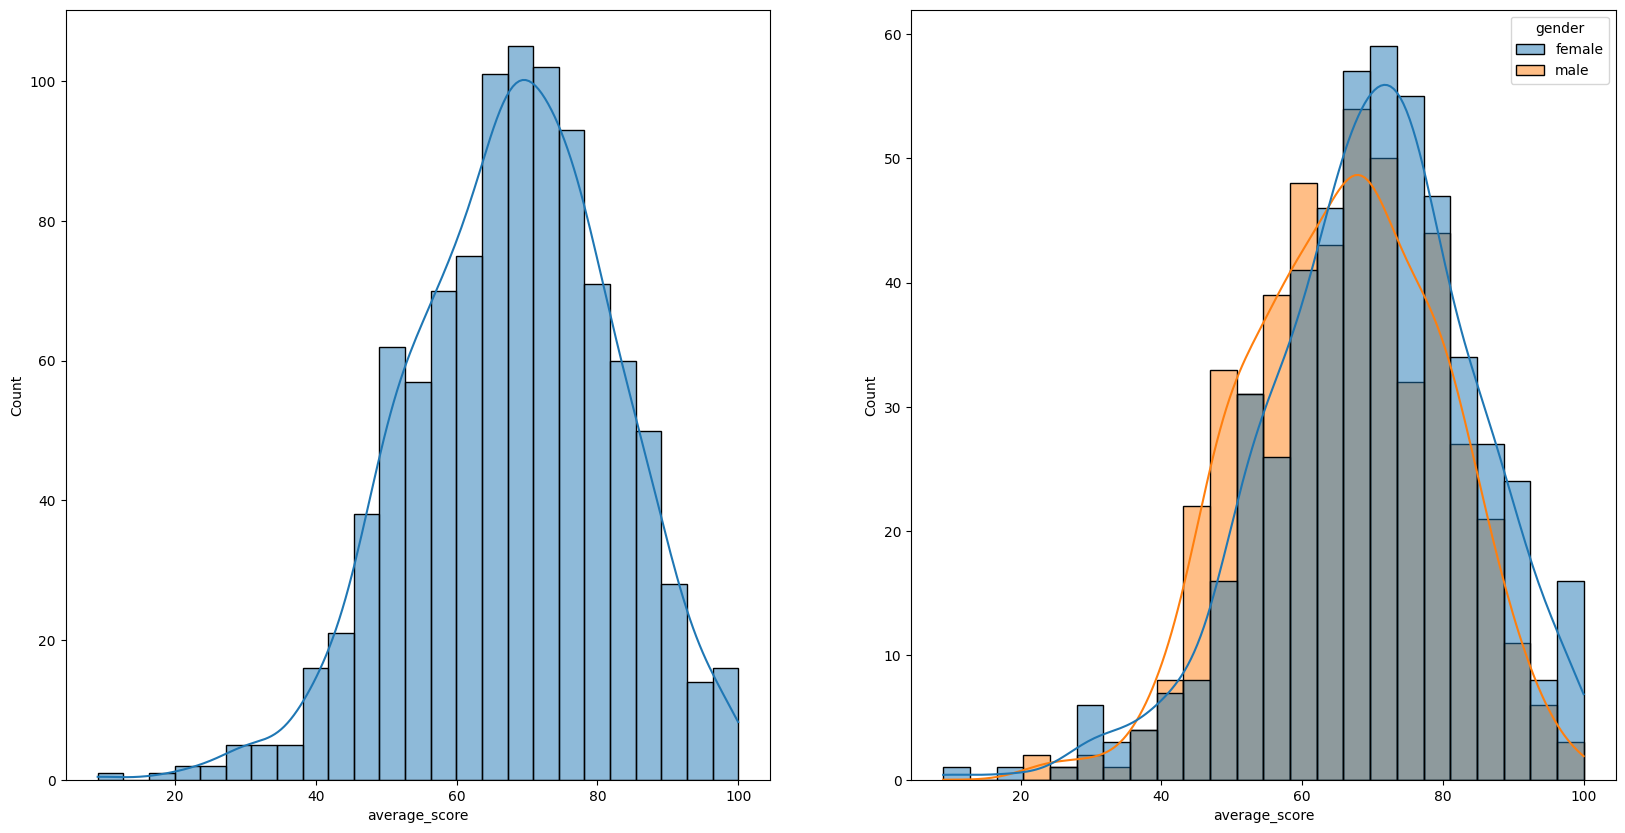

In [11]:
fig,axs = plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
sns.histplot(data=df,x='average_score',kde=True,bins=25)
plt.subplot(122)
sns.histplot(data=df,x='average_score',hue='gender',kde=True)

<Axes: >

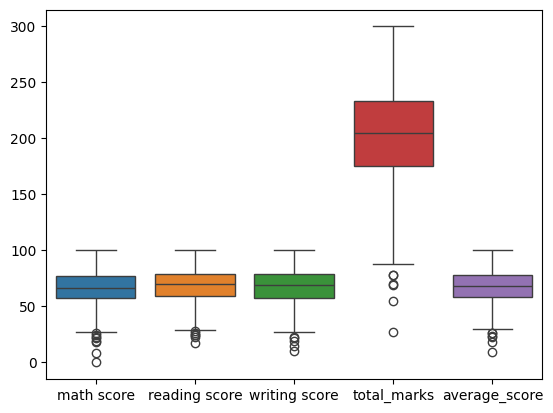

In [12]:
sns.boxplot(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total_marks                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


In [14]:
for col in df.columns:
    print(f"{col} : {df[col].unique()}\n")

gender : ['female' 'male']

race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch : ['standard' 'free/reduced']

test preparation course : ['none' 'completed']

math score : [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]

reading score : [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]

writing score : [ 74  

In [15]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [16]:
df.select_dtypes(include='object').columns.to_list()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total_marks                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


In [18]:
df.to_csv("EDA_StudentPerformance.csv",index=False)